In [1]:
import sys
import os
from pathlib import Path

# 1. Xử lý đường dẫn TRƯỚC
project_root = Path.cwd().parent  # Trỏ về thư mục gốc của project
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Thử chuyển CWD nếu cần (tùy chọn)
try:
    if Path(os.getcwd()).name == 'notebooks':
        os.chdir('..')
        print(f"CWD đã chuyển sang: {os.getcwd()}")
except Exception as e:
    print(f"Lỗi chuyển CWD: {e}")

# 2. Sau đó mới thực hiện Import
%load_ext autoreload
%autoreload 2
from src.models import get_model

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_train.npy')
X_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_test.npy')
y_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_train.npy')
y_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_test.npy')

In [3]:
from sklearn.model_selection import GridSearchCV

model_name = 'KNN'

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [4]:
# 3. Huấn luyện
best_model_knn = KNeighborsClassifier(**best_params)
print(f"Đang huấn luyện {model_name}...")
best_model_knn.fit(X_train, y_train)

# 4. Dự đoán và Đánh giá
y_pred = best_model_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy: {classification_report(y_test, y_pred, output_dict=True)["accuracy"]:.4f}')

Đang huấn luyện KNN...

Độ chính xác (Accuracy) của KNN: 93.86%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

------------------------------
F1_Score: 0.9377
Accuracy: 0.9386


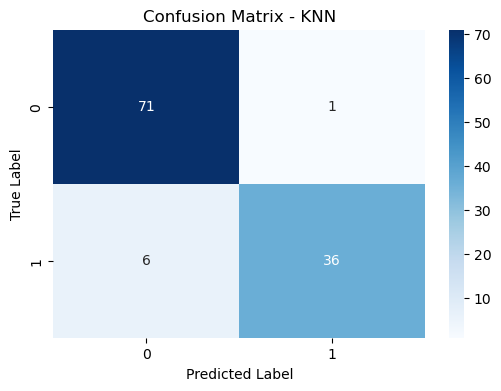

In [5]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [6]:
import joblib
import os

os.makedirs('models', exist_ok=True)

file_path_knn = "models/knn.pkl"

# Lưu mô hình AdaBoost (best_model_ab)
joblib.dump(best_model_knn, file_path_knn)

print(f"✅ Đã lưu mô hình KNN tại: {file_path_knn}")

✅ Đã lưu mô hình KNN tại: models/knn.pkl
